In [19]:
# Importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap 

In [25]:
# Importing or loading the dataset 
dataset = pd.read_csv('wine.csv') 
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [27]:
# distributing the dataset into two components X and Y 
X = dataset.iloc[:, 0:13].values 
y = dataset.iloc[:, 13].values 
  
# Splitting the X and Y into the 
# Training set and Testing set 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
1,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
2,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
4,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
138,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
139,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
140,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


In [28]:
# performing preprocessing part 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.876683,0.798429,0.644130,0.129743,0.488532,-0.703262,-1.428468,1.072457,-1.368203,0.351932,0.029017,-1.064122,-0.205908
1,-0.366591,-0.758130,-0.397799,0.333800,-1.413024,-1.441531,-0.502998,1.701100,0.023668,-0.841146,0.029017,-0.730832,-0.817047
2,-1.696894,-0.344248,-0.323375,-0.453279,-0.145320,1.249050,0.319642,-1.520697,-0.434631,-0.756829,0.901974,0.519005,-1.312565
3,0.516134,1.383263,0.420859,1.004275,0.136392,-0.752480,-1.233091,0.522394,-0.332787,0.950579,-1.105828,-1.425187,0.025334
4,0.640461,-0.506202,0.904612,0.129743,-0.286176,0.445157,0.679547,-0.656312,0.091564,-0.643002,0.727382,1.713295,0.339162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.448239,-0.587179,-1.811844,-0.016013,-0.990456,0.395939,-0.317904,0.050911,-0.315813,-1.258512,-0.058279,-0.203123,-1.081323
138,-0.764438,-1.082039,-1.662997,0.013139,-1.553880,-0.243895,0.052284,-0.734893,-0.960826,-0.153967,0.727382,1.241134,-0.767495
139,-0.702275,-0.686151,-0.658281,0.858519,0.558960,-0.424360,0.144831,-0.184830,0.006694,-1.258512,0.465495,0.519005,-1.312565
140,1.137771,-0.623169,-0.918763,-1.036300,0.065964,1.380298,1.481621,-1.206375,0.906318,0.444680,-0.189223,1.032828,0.801646


In [29]:
# Applying PCA function on training 
# and testing set of X component 
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
pd.DataFrame(X_train)

,0,1
0,-2.178845,-1.072185
1,-1.808192,1.578223
2,1.098295,2.221243
3,-2.555847,-1.662104
4,1.856981,0.241573
...,...,...
137,-0.501012,2.684532
138,0.330454,2.433962
139,0.010973,1.995855
140,2.891767,-0.771555


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [30]:
# Fitting Logistic Regression To the training set 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [31]:
# Predicting the test set result using predict function under LogisticRegression  
y_pred = classifier.predict(X_test) 

# making confusion matrix between test set of Y and predicted value. 
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1,2
0,14,0,0
1,1,15,0
2,0,0,6


In [32]:
# Scatter plot with the observations classified
def scatter_plot_distribution(X_set, y_set, ptitle):
    
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                         stop = X_set[:, 0].max() + 1, step = 0.01), 
                         np.arange(start = X_set[:, 1].min() - 1, 
                         stop = X_set[:, 1].max() + 1, step = 0.01)) 

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
                 X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
                 cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

    plt.xlim(X1.min(), X1.max()) 
    plt.ylim(X2.min(), X2.max()) 

    for i, j in enumerate(np.unique(y_set)): 
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
    
    plt.title(ptitle)
    plt.xlabel('PC1') # for Xlabel 
    plt.ylabel('PC2') # for Ylabel 
    plt.legend() # to show legend 

    # show scatter plot 
    plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


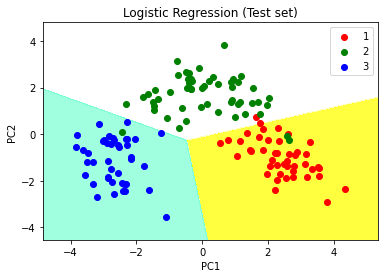

In [35]:
scatter_plot_distribution(X_train, y_train, 'Logistic Regression (Training set)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


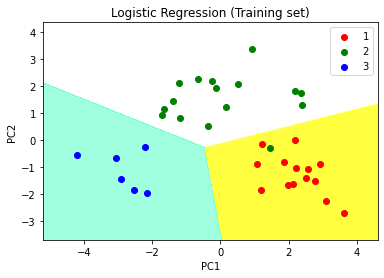

In [33]:
scatter_plot_distribution(X_test, y_test, 'Logistic Regression (Test set)')